# Avaliações de filmes, quais fatores impactam elas ? 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Análise: Filmes de Alto Orçamento e Notas de Avaliação

Neste estudo, investigamos as relações entre alguns fatores de produção de filmes e suas notas de avaliação. 

Uma das perguntas a serem respondidas é: 

## Os filmes com orçamento mais alto tendem a receber notas mais altas?

### Definição das Hipóteses

#### Hipótese Nula (H0)
A média das notas de filmes de alto orçamento é igual à média das notas de filmes de baixo orçamento.

#### Hipótese Alternativa (H1)
A média das notas de filmes de alto orçamento é maior do que a média das notas de filmes de baixo orçamento.


### Método Estatístico

Para testar essa hipótese, realizamos um teste de hipótese



# Limpar os dados

Aqui fazemos um processo para melhorar o dataset que estamos utilizando

In [2]:
# Adaptar o dataset para melhorar os dados
movies = pd.read_csv('archive/movies_metadata.csv')
movies = movies[['title','budget','id', 'original_language','popularity', 'production_countries', 'revenue', 'vote_average','vote_count']]
#Ordene os filmes por cache (budget) e mostre os 10 primeiros
movies['budget'] = pd.to_numeric(movies['budget'],'coerce').fillna(0).astype(float)
movies['revenue'] = pd.to_numeric(movies['revenue'],'coerce').fillna(0).astype(float)
movies = movies.loc[movies['budget'] != 0]
movies = movies.loc[movies['revenue'] != 0]
movies = movies.loc[movies['budget'] > 1000]
movies = movies.loc[movies['revenue'] > 1000]
movies.rename(columns={'id': 'movieId'}, inplace=True)
movies.set_index('movieId', inplace=True)
movies.dropna(inplace=True)
movies = movies.sort_values(by=['revenue'], ascending=False)
movies.head(10)

/Users/joaomarcostomaz/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title,budget,original_language,popularity,production_countries,revenue,vote_average,vote_count
movieId,,,,,,,,
19995,Avatar,237000000.0,en,185.070892,"[{'iso_3166_1': 'US', 'name': 'United States o...",2.787965e+09,7.2,12114.0
140607,Star Wars: The Force Awakens,245000000.0,en,31.626013,"[{'iso_3166_1': 'US', 'name': 'United States o...",2.068224e+09,7.5,7993.0
597,Titanic,200000000.0,en,26.88907,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.845034e+09,7.5,7770.0
24428,The Avengers,220000000.0,en,89.887648,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.519558e+09,7.4,12000.0
135397,Jurassic World,150000000.0,en,32.790475,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.513529e+09,6.5,8842.0
168259,Furious 7,190000000.0,en,27.275687,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1.506249e+09,7.3,4253.0
99861,Avengers: Age of Ultron,280000000.0,en,37.37942,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.405404e+09,7.3,6908.0
12445,Harry Potter and the Deathly Hallows: Part 2,125000000.0,en,24.990737,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1.342000e+09,7.9,6141.0
109445,Frozen,150000000.0,en,24.248243,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.274219e+09,7.3,5440.0


# Estatística observada

Para um bom teste de hipótese, devemos ter uma estatística observada!

Vamos utilizar a diferença das médias

Aqui consideramos que, um filme com uma nota >= 6 é considerado bom, notas menores são filmes não tão bons. Decidimos assim pois é como alguns críticos adotam.

In [3]:
# Função para calcular a estatística observada
def t_obs(data):
    bom = data[data['vote_average'].values >= 6.0]['revenue'].values
    ruim = data[data['vote_average'].values < 6.0]['revenue'].values
    estatistica = np.mean(bom) - np.mean(ruim)
    return estatistica

tobs = t_obs(movies)
print(tobs)

44115151.31931278


# Teste de permutação

Vamos permutar os grupos e gerar um intervalo de confiança para termos uma noção dos dados

In [4]:
# Função para fazer o teste de permutação e gerar os intervalos de confiança
def shuffling(data):
    permutadas = np.zeros(5000)
    n = 5000
    col = "vote_average"
    for i in range(n):
        data_copy = data.copy()
        data_copy["Permutation"] = np.random.permutation(data_copy[col].values)
        new = data_copy[["revenue", "Permutation"]]
        means = new.groupby(by="Permutation").mean().reset_index()
        mean_first = means[means["Permutation"] >= 6.0]["revenue"].mean()
        mean_sec = means[means["Permutation"] < 6.0]["revenue"].mean()
        diff = mean_first - mean_sec
        permutadas[i] = diff

    mean_permutadas = np.mean(permutadas)
    std_permutadas = np.std(permutadas)
    LI = np.percentile(permutadas, 2.5)
    LS = np.percentile(permutadas, 97.5)
    return (LI, LS, mean_permutadas, std_permutadas, permutadas)

LI, LS, mean_permutadas, std_permutadas, permutadas = shuffling(movies)
print(LI, LS)

-35272879.85287705 35642499.88339987


In [5]:
#Observar o p_valor
def resposta():
    stats = tobs
    def shuff(movies):
        N = 1000
        diffs = np.zeros(N)
        vote = movies["vote_average"].values
        revenue = movies["revenue"].values
        for i in range(N):
            permutations = np.random.permutation(vote)
            grup1 = revenue[permutations >= 6.0]
            grup2 = revenue[permutations < 6.0]
            diff = np.mean(grup1) - np.mean(grup2)
            diffs[i] = diff

            p_value = np.sum(diffs >= stats) / len(diffs)

        return p_value < 0.05
    
    p_value = shuff(movies)
    return p_value

print(resposta())


True


# Interpretação do resultado 

No caso observado, o valor-p é menor que 0.05 (p_valor<0.05). Isso indica que existe evidência estatística para rejeitar a hipótese nula de que não há diferença na receita entre filmes com avaliações altas e baixas.

Podemos concluir que há uma diferença estatisticamente significativa na receita entre filmes com avaliações iguais ou superiores a 6.0 e filmes com avaliações inferiores a 6.0. O intervalo de confiança fornece uma estimativa da magnitude dessa diferença.

Abaixo segue-se alguns plots demonstrando os intervalos

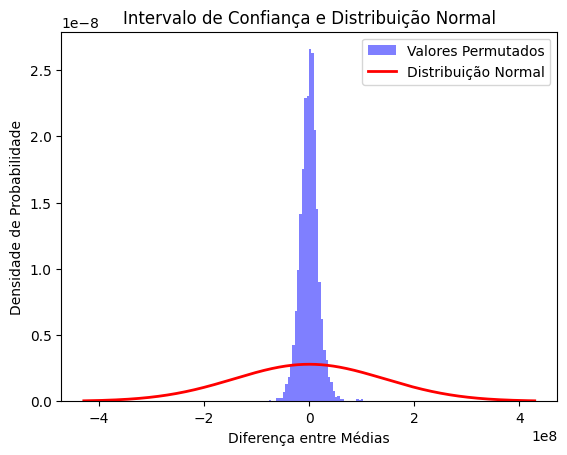

In [6]:
from scipy.stats import norm
mean = (LI + LS) / 2
std = (LS-LI)/(2*norm.pdf(0.975))

# Crie uma distribuição normal com os valores calculados acima
x = np.linspace(mean - 3*std, mean + 3*std, 1000)
y = norm.pdf(x, mean, std)


# Crie um histograma dos valores permutados com mais bins e cores personalizadas
plt.hist(permutadas, bins=50, density=True, alpha=0.5, color='blue', label='Valores Permutados')

# Plote a distribuição normal em vermelho
plt.plot(x, y, 'r', lw=2, label='Distribuição Normal')

# Defina rótulos e título
plt.xlabel('Diferença entre Médias')
plt.ylabel('Densidade de Probabilidade')
plt.title('Intervalo de Confiança e Distribuição Normal')

# Adicione uma legenda
plt.legend()

# Mostre o gráfico
plt.show()


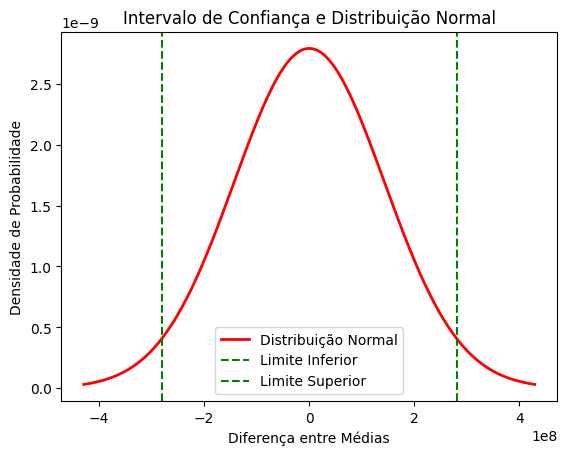

In [7]:
from scipy.stats import norm
ci = norm.interval(0.95, loc=mean, scale=std)
# Outro plot da distribuição normal para visualizar o intervalo de confiança
plt.plot(x, y, 'r', lw=2, label='Distribuição Normal')
plt.axvline(x=ci[0], color='green', label='Limite Inferior', linestyle='--')
plt.axvline(x=ci[1], color='green', label='Limite Superior', linestyle='--')
plt.xlabel('Diferença entre Médias')
plt.ylabel('Densidade de Probabilidade')
plt.title('Intervalo de Confiança e Distribuição Normal')
plt.legend()
plt.show()

# Correlação

Calculando a correlação entre os dados, para observarmos se o resultado em que chegamos é coerente. A correlação positiva prova que estamos corretos!

In [9]:
# Correlação entre as variáveis
corr = movies['vote_average'].corr(movies['revenue'])
print(corr)

0.16813371113851516


# Análise Estatística: Gastos de Produção e Avaliações de Filmes

Ok, sabemos agora que ter um valor de retorno alto impacta positivamente nas avaliações, porém, ter um orçamento alto támbém impacta? 

Nesta análise, investigamos se há uma relação entre os gastos de produção de filmes e suas avaliações. A pergunta central é: os filmes com maiores gastos de produção tendem a receber avaliações mais altas?

## Definição das Hipóteses

### Hipótese Nula (\(H_0\))
A média das avaliações de filmes com maiores gastos de produção é igual à média das avaliações de filmes com menores gastos de produção.

### Hipótese Alternativa (\(H_1\))
A média das avaliações de filmes com maiores gastos de produção é maior do que a média das avaliações de filmes com menores gastos de produção.

## Método Estatístico

Utilizamos um teste de hipótese para chegar no resultado!

# Estatística observada

Utilizaremos novamente a diferença entre as médias

In [10]:
# Função para calcular a estatística observada
def t_obs2(data):
    alto = data[data['budget'].values >=  22586541.0]['vote_average'].values
    baixo = data[data['budget'].values < 22586541.0]['vote_average'].values
    estatistica = np.mean(alto) - np.mean(baixo)
    return estatistica

tobs2 = t_obs2(movies)
print(tobs2)

-0.12928124072081282


In [11]:
# Função para fazer o teste de permutação e gerar os intervalos de confiança
def shuffling2(data):
    N = 5000
    permutadas = np.zeros(N)
    col = "budget"
    for i in range(N):
        # Permute a coluna de interesse
        data_copy = data.copy()
        data_copy["Permutation"] = np.random.permutation(data_copy[col].values)
        new = data_copy[["vote_average", "Permutation"]]
        means = new.groupby(by="Permutation").mean().reset_index()
        mean_first = means[means["Permutation"] >= 22586541.0]["vote_average"].mean()
        mean_sec = means[means["Permutation"] < 22586541.0]["vote_average"].mean()
        diff = mean_first - mean_sec
        permutadas[i] = diff
    
    mean_permutadas = np.mean(permutadas)
    std_permutadas = np.std(permutadas)
    # Calcule os limites do intervalo de confiança
    LI = np.percentile(permutadas, 2.5)
    LS = np.percentile(permutadas, 97.5)
    return (LI, LS, mean_permutadas, std_permutadas, permutadas)

LI2, LS2, mean_permutadas2, std_permutadas2, permutadas2 = shuffling2(movies)
print(LI2, LS2)

-0.1210940560772924 0.11815712688641603


In [12]:
# Observar o p_valor
def resposta2():
    stats = tobs2
    def shuff(movies):
        N = 1000
        diffs = np.zeros(N)
        vote = movies["vote_average"].values
        budget = movies["budget"].values
        for i in range(N):
            permutations = np.random.permutation(budget)
            grup1 = vote[permutations >= 22586541.0]
            grup2 = vote[permutations < 22586541.0]
            diff = np.mean(grup1) - np.mean(grup2)
            diffs[i] = diff

            p_value = np.sum(diffs >= stats) / len(diffs)
        # Retorne o valor do p-valor
        return p_value < 0.05
    
    p_value = shuff(movies)
    return p_value

print(resposta2())


False


## Análise dos resultados

Com base nos resultados, podemos concluir que, dentro do intervalo de confiança estabelecido, não há evidências estatísticas para afirmar que os filmes com maiores gastos de produção têm avaliações significativamente diferentes dos filmes com menores gastos. O valor-p maior que 0.05 sugere que a diferença observada nas médias pode ser atribuída ao acaso.

Esses resultados indicam que, pelo menos com base nos dados analisados, não podemos afirmar que o montante gasto na produção de filmes está diretamente associado a avaliações mais altas.

Este resultado era esperado! Possuimos diversos exemplos no cinema de filmes com pouquissimos gastos que são referências, como Atividade Paranormal ou Jogos Mortais! 

Os critérios para uma boa avaliação devem ser diferentes dos presumidos aqui!


Abaixo temos os plots da análise

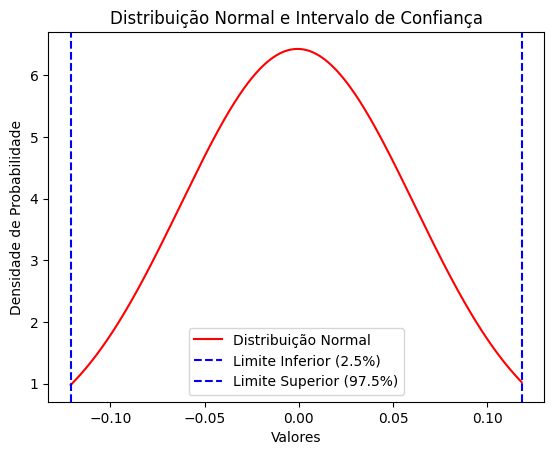

In [13]:
x = np.linspace(LI2, LS2, 1000)
y = norm.pdf(x, loc=mean_permutadas2, scale=std_permutadas2)
# Plote a distribuição normal

plt.plot(x, y, label='Distribuição Normal', color='red')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal e Intervalo de Confiança')
plt.axvline(LI2, color='blue', linestyle='--', label='Limite Inferior (2.5%)')
plt.axvline(LS2, color='blue', linestyle='--', label='Limite Superior (97.5%)')
plt.legend()
plt.show()


# Correlação

Podemos ver pelo resultado da correlação que não há como dizer que os gastos afetam estatisticamente as avaliações dos filmes, assim como previsto!

In [14]:
# Correlação entre as variáveis
corr2 = movies['budget'].corr(movies['vote_average'])
print(corr2)

-0.010535911853109835


# Análise Estatística: Lucros e Idioma dos Filmes

Nesta análise, exploramos a possibilidade de os filmes de maiores lucros serem necessariamente de língua inglesa. A pergunta central é: há uma relação significativa entre os lucros de um filme e o fato de ser em língua inglesa?

Ao analisar os dados, foi observado que poderia haver-se uma diferença

Essa análise será importante para os métodos que utilzaremos posteriormente

## Definição das Hipóteses

### Hipótese Nula (HO)
A proporção de filmes de língua inglesa com maiores lucros é igual à proporção de filmes não em língua inglesa com maiores lucros.

### Hipótese Alternativa (H1)
A proporção de filmes de língua inglesa com maiores lucros é maior do que a proporção de filmes não em língua inglesa com maiores lucros.


## Método Estatístico

Aqui também utilizamos um teste de hipótese


# Estatística observada

Novamente pegamos a diferença entre as médias

É valido ressaltar que o lucro = receita - gastos

In [15]:
movies["lucro"] = movies["revenue"] - movies["budget"]
movies["taxa_lucro"] = movies["lucro"] / movies["budget"]
movies.head()
# Função para calcular a estatística observada
def t_obs4(data):
    english = data[data['original_language'].values == 'en']['lucro'].values
    other = data[data['original_language'].values != 'en']['lucro'].values
    estatistica = np.mean(english) - np.mean(other)
    return estatistica

tobs4 = t_obs4(movies)
print(tobs4)

47952903.09100418


In [16]:
# Função para fazer o teste de permutação e gerar os intervalos de confiança
def shuffling4(data):
    N = 5000
    permutadas = np.zeros(N)
    col = "original_language"
    for i in range(N):

        data_copy = data.copy()
        data_copy["Permutation"] = np.random.permutation(data_copy[col].values)
        new = data_copy[["lucro", "Permutation"]]
        means = new.groupby(by="Permutation").mean().reset_index()
        mean_first = means[means["Permutation"] == 'en']["lucro"].mean()
        mean_sec = means[means["Permutation"] != 'en']["lucro"].mean()
        diff = mean_first - mean_sec
        permutadas[i] = diff
    
    mean_permutadas = np.mean(permutadas)
    std_permutadas = np.std(permutadas)
    # Calcule os limites do intervalo de confiança
    LI = np.percentile(permutadas, 2.5)
    LS = np.percentile(permutadas, 97.5)
    return (LI, LS, mean_permutadas, std_permutadas, permutadas)

LI4, LS4, mean_permutadas4, std_permutadas4, permutadas4 = shuffling4(movies)
print(LI4, LS4)

-31883003.27325772 22300104.25336862


In [17]:
# Observar o p_valor
def resposta4():
    stats = tobs4
    def shuff(movies):
        N = 1000
        diffs = np.zeros(N)
        lucro = movies["lucro"].values
        original_language = movies["original_language"].values
        for i in range(N):
            permutations = np.random.permutation(original_language)
            grup1 = lucro[permutations == 'en']
            grup2 = lucro[permutations != 'en']
            diff = np.mean(grup1) - np.mean(grup2)
            diffs[i] = diff

            p_value = np.sum(diffs >= stats) / len(diffs)

        return p_value < 0.05
    
    p_value = shuff(movies)
    return p_value

print(resposta4())

True


# Análise dos resultados 

Com base nos resultados, podemos concluir que há uma diferença estatisticamente significativa nos lucros médios entre filmes de língua inglesa e não inglesa. O intervalo de confiança, apesar de amplo, sugere que os filmes de língua inglesa, em média, podem ter lucros mais altos. No entanto, a variabilidade nos dados é considerável, como indicado pelo intervalo de confiança abrangente.

Observamos portanto que há uma discrepância entre o quanto um filme lucra simplismente pelo fato de sua lingua principal ser o inglês

Abaixo segue alguns plots demonstrando isso e mostrando a diferença entre os intervalos de confiança de várias linguas 

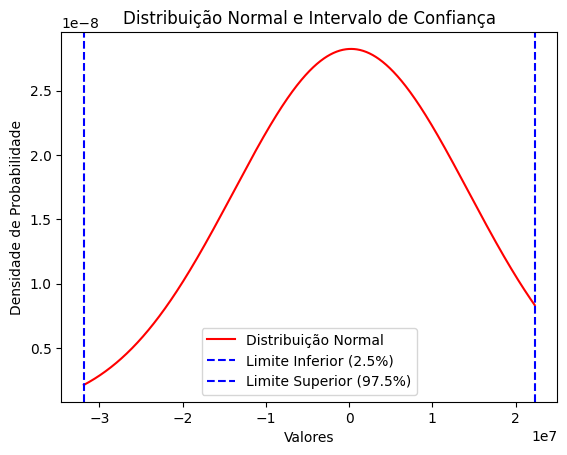

In [18]:
x = np.linspace(LI4, LS4, 1000)
y = norm.pdf(x, loc=mean_permutadas4, scale=std_permutadas4)

# Plote a distribuição normal
plt.plot(x, y, label='Distribuição Normal', color='red')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal e Intervalo de Confiança')
plt.axvline(LI4, color='blue', linestyle='--', label='Limite Inferior (2.5%)')
plt.axvline(LS4, color='blue', linestyle='--', label='Limite Superior (97.5%)')
plt.legend()
plt.show()

In [19]:
linguas = movies['original_language'].unique()
linguas
# Calcular os intervalos de confiança para lingua inglesa
media_en = movies[movies['original_language'].values == 'en']['lucro'].mean()
std_en = movies[movies['original_language'].values == 'en']['lucro'].std()
z = 1.96
CI_INF = media_en - z * (std_en/np.sqrt(len(movies[movies['original_language'].values == 'en'])))
CI_SUP = media_en + z * (std_en/np.sqrt(len(movies[movies['original_language'].values == 'en'])))
print(CI_INF, CI_SUP)

60916762.82683327 69270237.8736936


In [20]:
import scipy.stats as stats
resultado = []
alpha = 0.01

# Calcular os intervalos de confiança para todas as linguas
for lingua in linguas:
    df_lingua = movies[movies['original_language'].values == lingua]['lucro']
    ci = stats.norm.interval(confidence=(1-alpha), loc=np.mean(df_lingua), scale=stats.sem(df_lingua, nan_policy='omit'))
    resultado.append({'lingua': lingua, 'ci': ci})

for result in resultado:
    print(f'lingua: {result["lingua"]}, intervalo de confiança: {result["ci"]}')

resultado_ordenado = sorted(resultado, key=lambda k: k['ci'][0], reverse=True)
top_5 = resultado_ordenado[:5]

lingua: en, intervalo de confiança: (59604437.64307788, 70582563.05744898)
lingua: fr, intervalo de confiança: (-2512049.9713480603, 25459806.26680261)
lingua: zh, intervalo de confiança: (24342733.076519348, 112939246.71658412)
lingua: hi, intervalo de confiança: (8963869.318665136, 28271517.53550153)
lingua: ja, intervalo de confiança: (15020710.290324073, 68127779.19685541)
lingua: te, intervalo de confiança: (-26052373.404807396, 105313615.90480739)
lingua: it, intervalo de confiança: (-8552920.016177265, 29003885.482843928)
lingua: da, intervalo de confiança: (-15761501.641669529, 48351280.00530589)
lingua: cn, intervalo de confiança: (-8481220.563010652, 48503469.89634399)
lingua: ko, intervalo de confiança: (3592175.7101877034, 38131555.33743134)
lingua: sv, intervalo de confiança: (-10614593.412187785, 49650176.412187785)
lingua: es, intervalo de confiança: (3568660.597765064, 24314775.191708617)
lingua: ta, intervalo de confiança: (3903404.004940698, 24019320.8750593)
lingua: 

/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


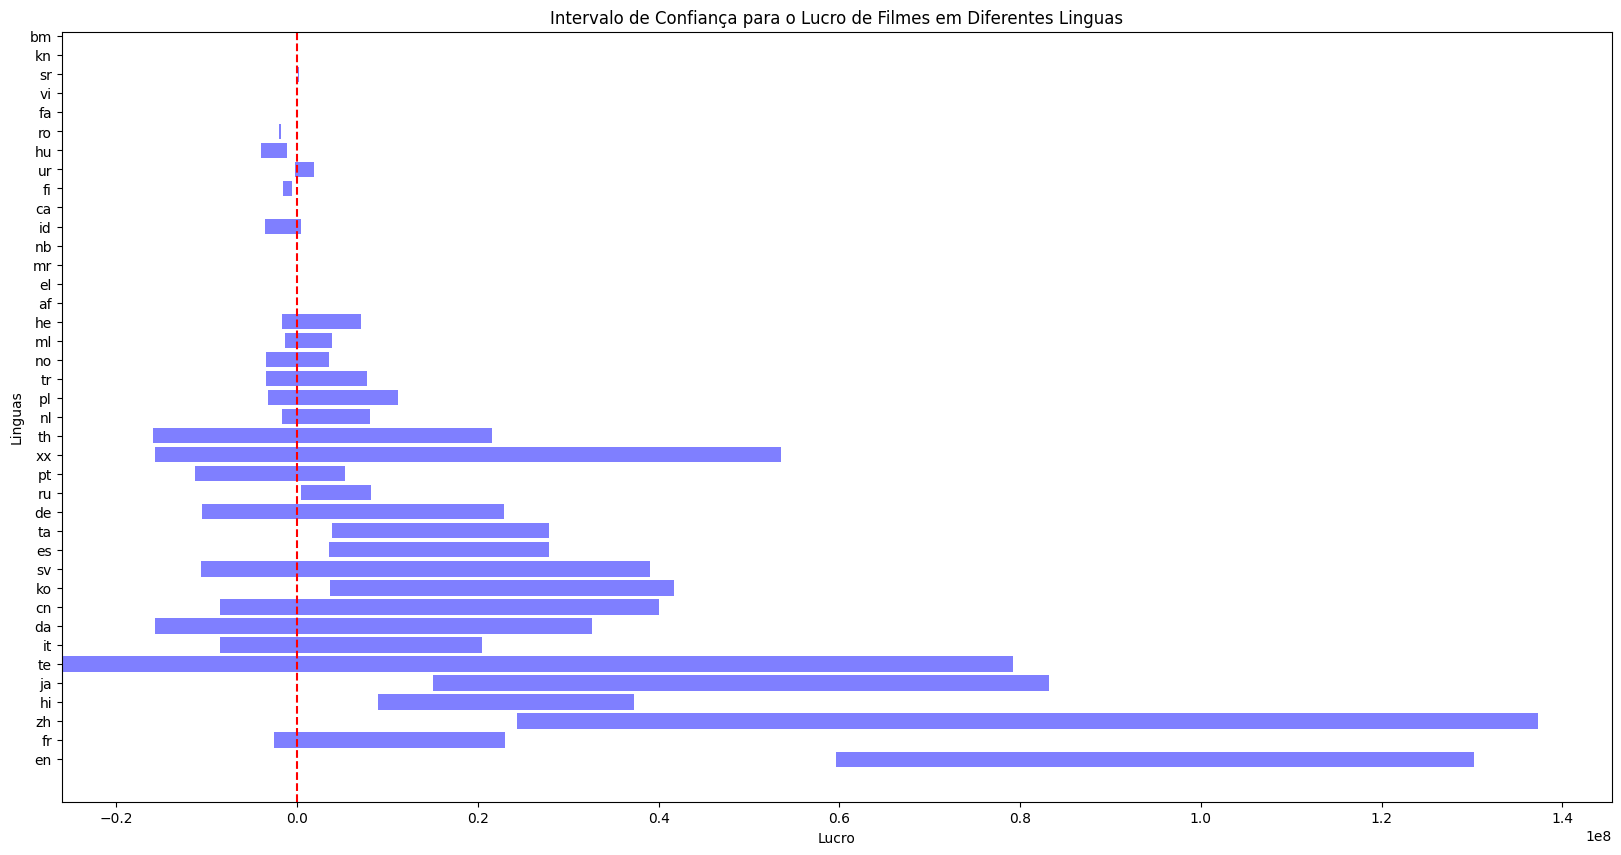

In [21]:
resultados = [result["lingua"] for result in resultado]
cis = [result["ci"] for result in resultado]

lb = [ci[0] for ci in cis]
ub = [ci[1] for ci in cis]

# Plotar o gráfico de barras mostrando os intervalos
plt.figure(figsize=(20,10))
plt.barh(resultados, ub, left=lb, color='blue', alpha=0.5)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Lucro')
plt.ylabel('Linguas')
plt.title('Intervalo de Confiança para o Lucro de Filmes em Diferentes Linguas')
plt.show()



Para melhorar a visualização, observemos apenas os 5 maiores e mais impactantes intervalos

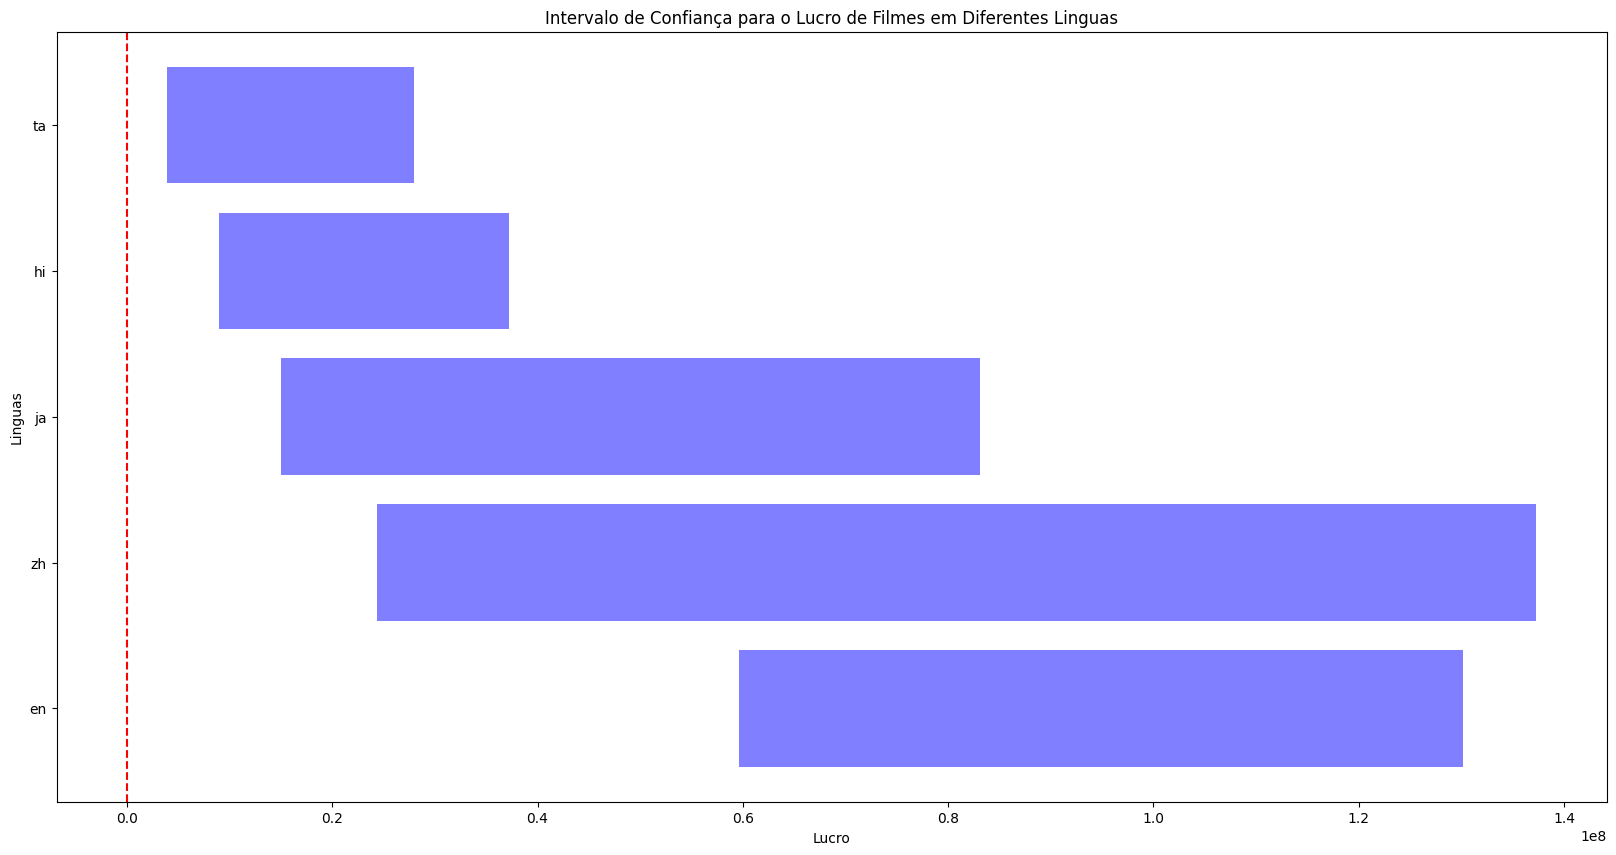

In [22]:
# Plotar apenas os 5 primeiros
languages = [result["lingua"] for result in top_5]
cis = [result["ci"] for result in top_5]

lb = [ci[0] for ci in cis]
ub = [ci[1] for ci in cis]

plt.figure(figsize=(20,10))
plt.barh(languages, ub, left=lb, color='blue', alpha=0.5)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Lucro')
plt.ylabel('Linguas')
plt.title('Intervalo de Confiança para o Lucro de Filmes em Diferentes Linguas')
plt.show()


## Predição

# Será que, com estes dados e análises, podemos predizer a nota de um filme ?? 

Primeiramente faremos análises para aplicar uma regressão linear

In [23]:
#Dividir os dados em apenas lucro, lingua original, vote_count e popularidade
df = movies[['lucro', 'original_language', 'vote_average', 'popularity', 'budget']]
pd.to_numeric(df['popularity'],'coerce').fillna(0).astype(float)
df

,lucro,original_language,vote_average,popularity,budget
movieId,,,,,
19995,2.550965e+09,en,7.2,185.070892,237000000.0
140607,1.823224e+09,en,7.5,31.626013,245000000.0
597,1.645034e+09,en,7.5,26.88907,200000000.0
24428,1.299558e+09,en,7.4,89.887648,220000000.0
135397,1.363529e+09,en,6.5,32.790475,150000000.0
...,...,...,...,...,...
98339,-1.199748e+07,en,5.2,11.52128,12000000.0
138222,-1.498062e+06,en,6.1,5.875708,1500000.0
74254,-1.283230e+05,en,5.0,0.11689,130000.0


# Analisando os dados

Fazendo um plot, observamos que existe alguma possivel relação entre gastos, lucro e a média de notas. Aqui não utilizamos a lingua pois é um dado categórico e por decisão de projeto, utilizaremos outro método para avaliar tal fator


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


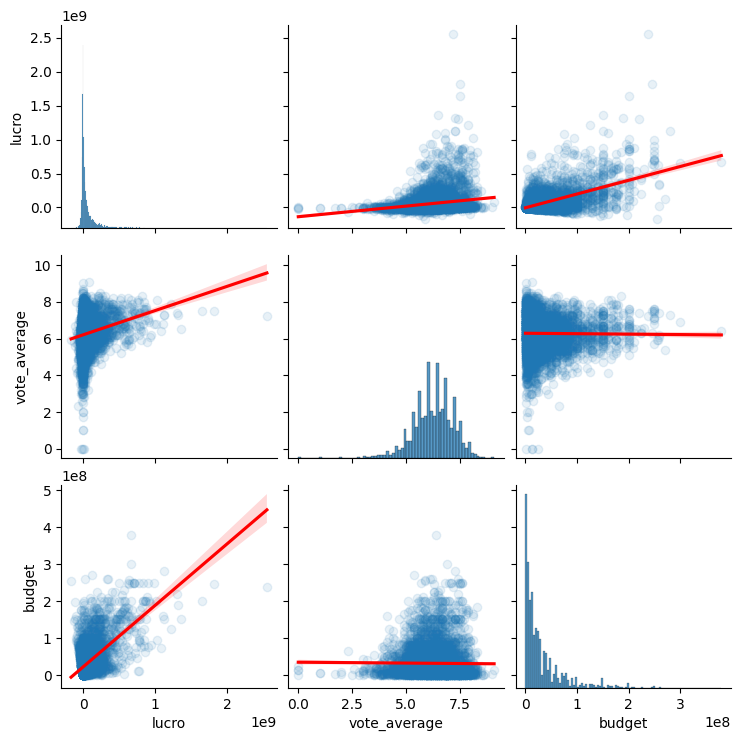

In [24]:
import seaborn as sns
# Plotar o pairplot para ter uma visão geral dos dados
sns.pairplot(df[['lucro', 'vote_average', 'popularity', 'budget']], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

# Primeira análise

Assim como feito acima, com o teste de hipótese, foi provado que gastos e a média da nota aparentemente não se correlacionavam. Podemos observar isto também com um modelo de regressão linear!

Ao fazer o modelo, se obtivermos um resultado de Rˆ2 = 0, podemos dizer que não há relação entre os dados! 

R^2 é um coeficiente que explica o quão os dados de entrada explicam da variância do dado a ser predito.

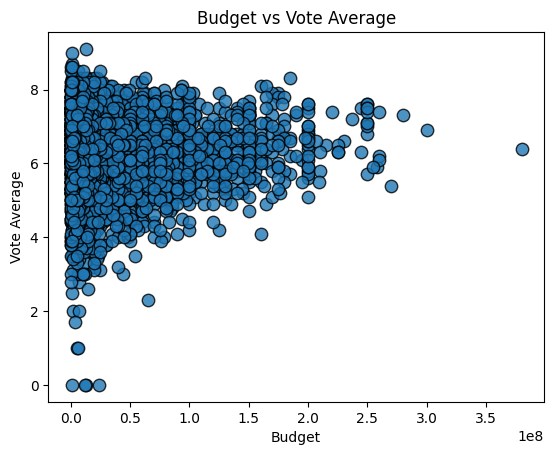

In [25]:
## Observar regressão linear entre budget e vote_average e plotar
x = df['budget']
y = df['vote_average']

plt.scatter(x,y,alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.title('Budget vs Vote Average')
plt.show()

### Normalizando os dados e tentando fazer o esboço de um traço que melhor define obtivemos o seguinte resultado

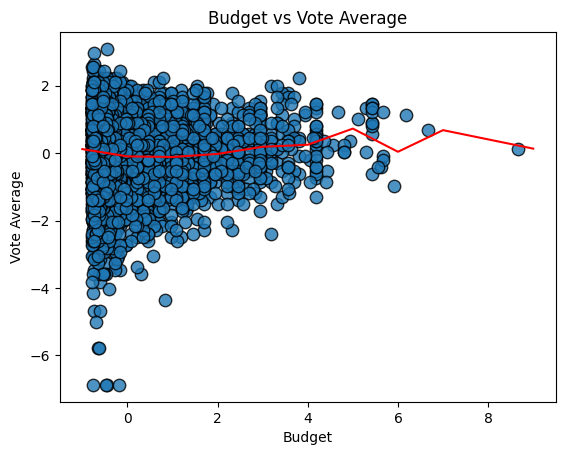

In [26]:
# Normalizar os dados
normed = df[['budget', 'vote_average']].copy()
normed = (normed - normed.mean()) / normed.std()
x = normed['budget'].copy()
y = normed['vote_average'].copy()
normed['budget'] = normed['budget'].round()
model = normed.groupby('budget').mean()
x_normed = model.index
y_normed = model.values
# plotar o gráfico 
plt.scatter(x,y,alpha=0.8, edgecolors='k', s=80)
plt.plot(x_normed, y_normed, color='red')
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.title('Budget vs Vote Average')
plt.show()


### Ajustando ao erro, temos a seguinte reta

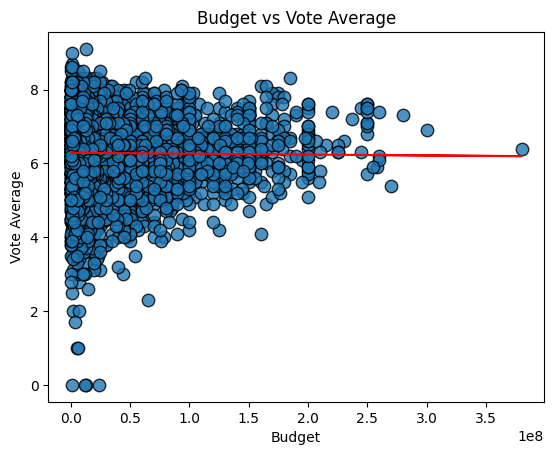

In [27]:
from scipy import stats as ss
def least_squares_fit(x, y):
    correlationxy = ss.pearsonr(x, y)[0]
    beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

x = df['budget'].values
y = df['vote_average'].values
alpha,beta = least_squares_fit(x,y)
y_model = alpha + beta * x
plt.scatter(x,y,alpha=0.8, edgecolors='k', s=80)
plt.plot(x,y_model, color='red')
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.title('Budget vs Vote Average')
plt.show()

In [28]:
# Calcular o erro
def error(alpha, beta, x, y):
    model = beta * x + alpha
    return y - model

# Calcular a soma dos erros quadráticos
def sum_of_squared_errors(alpha, beta, x, y):
    return (error(alpha, beta, x, y) ** 2).sum()

# Calcular a soma total dos quadrados
def total_sum_of_squares(y):
    return ((y - y.mean()) ** 2).sum()

# Calcular o coeficiente de determinação
def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

r_squared(alpha,beta,x,y)

0.00011100543857656131

### Vamos agora plotar a distancia de cada ponto no gráfico até a reta obtida, o que configura os erros 

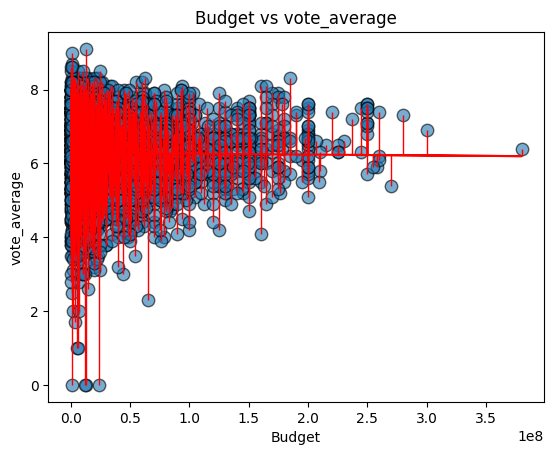

In [29]:
# Plota o grafico de dispersão dos erros
x = df['budget']
y = df['vote_average']
model = ss.linregress(x,y)
beta = model.slope
alpha = model.intercept

plt.scatter(x,y,edgecolors='k',s=80, alpha=0.6)
plt.title('Budget vs vote_average')
plt.xlabel('Budget')
plt.ylabel('vote_average')

y_bar = x * beta + alpha
plt.plot(x,y_bar, color='red')

y_min = [min(y_i, y_bar_i) for y_i,y_bar_i in zip(y,y_bar)]
y_max = [max(y_i, y_bar_i) for y_i,y_bar_i in zip(y,y_bar)]
plt.vlines(x,ymin=y_min,ymax=y_max,color='red',lw=1)


## Traçando agora uma gráfico de disperção de resíduos e um gráfico de probabilidade

O gráfico de dispersão de resíduos é útil para identificar padrões não capturados pelo modelo de regressão. Se os resíduos estão distribuídos aleatoriamente em torno da linha de referência, isso sugere que o modelo de regressão é apropriado. Se padrões ou tendências são observados nos resíduos, isso pode indicar problemas com o modelo.

O gráfico de probabilidade compara os resíduos com uma distribuição teórica, geralmente a distribuição normal padrão. Se os pontos no gráfico seguem aproximadamente uma linha reta, isso sugere que os resíduos seguem uma distribuição normal. Desvios significativos da linha podem indicar que os resíduos não seguem uma distribuição normal, o que pode impactar as inferências estatísticas do modelo.



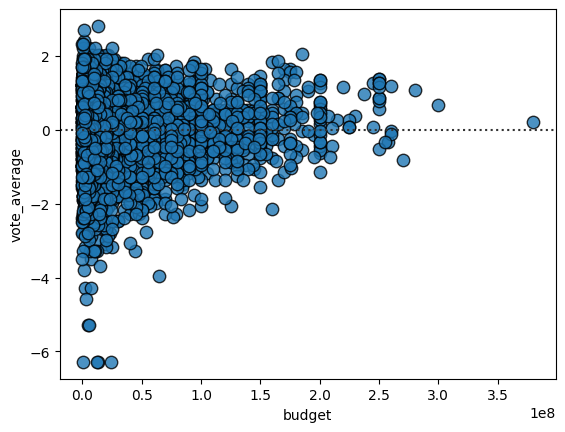

In [30]:
# Plota o grafico de residuos
sns.residplot(x = 'budget', y='vote_average', data=df,
                line_kws={'color':'red', 'lw':4},
                scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.show()

((array([-3.65125983, -3.41688175, -3.28775188, ...,  3.28775188,
          3.41688175,  3.65125983]),
  array([-6.28640193, -6.28370205, -6.28346312, ...,  2.41371754,
          2.71378922,  2.81658467])),
 (0.9011322979134431, -4.195739700339282e-16, 0.9861452450195113))

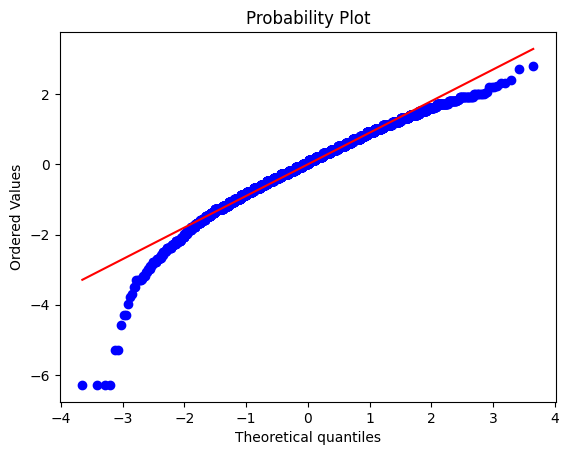

In [31]:
# Plota o grafico de probabilidade normal
ss.probplot(y - y_bar, plot=plt)

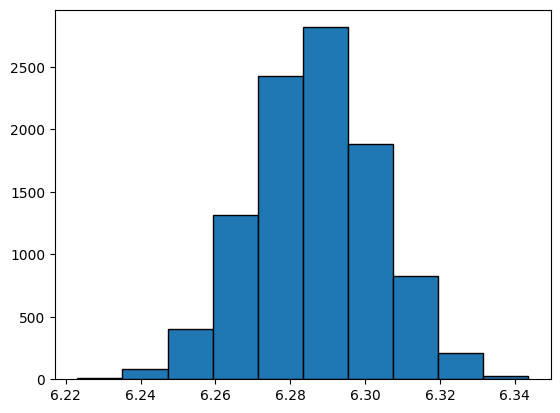

In [32]:
# Gera o bootstrap para a regressão
def bootstrap_regression(df, n=10000, size=None):
    if size is None:
        size = len(df)
    
    alphas = np.zeros(n)
    betas = np.zeros(n)
    rs = np.zeros(n)

    for i in range(n):
        sample = df.sample(size, replace=True)
        x = sample['budget'].values
        y = sample['vote_average'].values
        alpha, beta = least_squares_fit(x, y)
    
        alphas[i] = alpha
        betas[i] = beta
        rs[i] = ss.pearsonr(x, y)[0] ** 2
    return alphas, betas, rs

# Plota o grafico do bootstrap para os alphas
aux = df[['budget', 'vote_average']]
alphas,betas,rs = bootstrap_regression(aux)
plt.hist(alphas, edgecolor='k')
lower = np.percentile(alphas,2.5)
upper = np.percentile(alphas, 97.5)
plt.show()


In [33]:
# printa os valores de alpha
print(alphas.mean())
print(lower, upper)

6.286586265043865
6.253715454410982 6.319316180210954


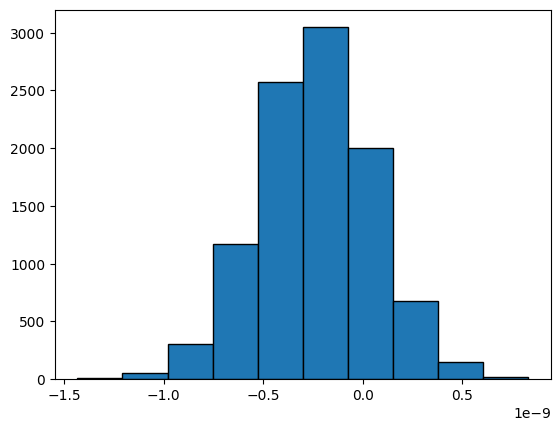

In [34]:
# Plotar o histograma dos betas
plt.hist(betas, edgecolor='k')
lower = np.percentile(betas, 2.5)
upper = np.percentile(betas,97.5)
plt.show()

In [35]:
# printa os valores de beta
print(betas.mean())
print(lower, upper)

-2.3710576873065935e-10
-8.05884664620612e-10 3.262093123432803e-10


## Analisando os dados do bootstrap da regressão

Os intervalos de confiança restritos e os valores de alpha e beta sugerem o esperado! Note que os valores de alpha estão muito próximos da média estipulada anteriormente, o que indica que não há tanto uma relação entre os dados observados. Beta indica a inclinação entre eles, e como beta é muito proximo de 0 indica-se que os dados não estão totalmente inclinados entre si

### Vamos agora aplicar a regressão observando o impacto dos gastos nas avaliações e interpretar os dados gerados no sumário

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Cria o modelo de regressão apenas com o budget
model = smf.ols('vote_average ~ budget', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5895
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.443
Time:                        22:45:54   Log-Likelihood:                -7055.2
No. Observations:                5312   AIC:                         1.411e+04
Df Residuals:                    5310   BIC:                         1.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2866      0.016    395.211      0.0

### Assim como esperado, o R^2 = 0, os gastos de um filme não podem explicar a variância das avaliações

## Vamos agora adicionar o que representa a popularidade do filme juntamente com os gastos para ver se existe essa relação

In [37]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df.dropna()

# Cria o modelo de regressão com budget e popularidade
X = sm.add_constant(df[['budget','popularity']])
model = sm.OLS(df['vote_average'], X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     82.04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           8.12e-36
Time:                        22:45:54   Log-Likelihood:                -6974.6
No. Observations:                5312   AIC:                         1.396e+04
Df Residuals:                    5309   BIC:                         1.397e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2083      0.017    369.079      0.0

/var/folders/q8/9d5d2vtj4832w_98dq64xxr00000gn/T/ipykernel_2724/1892574734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
/var/folders/q8/9d5d2vtj4832w_98dq64xxr00000gn/T/ipykernel_2724/1892574734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
/var/folders/q8/9d5d2vtj4832w_98dq64xxr00000gn/T/ipykernel_2724/1892574734.py:3: SettingWithCopyWarning: 
A value is trying to be 

### Aqui podemos ver que, mesmo juntos, os dados ainda explicam muito pouco sobre as avaliações. A regressão multipla contém um Rˆ2 ainda muito baixo 

# Vamos agora utilizar um outro modelo de ML para tentar obter um resultado melhor. Utilizando árvore de decisão

A ideia agora é utilizar todas as análises para montar um modelo melhor e tentar predizer a nota de um filme

O modelo utiliza como base: Lingua original, lucro, gasto e popularidade

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Cria o modelo de randomforest com budget, popularidade e lucro
x = df[['original_language', 'budget','popularity', 'lucro']]
y = df['vote_average']

categorical_features = ['original_language']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['budget','popularity', 'lucro']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
])


model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', RandomForestRegressor(n_estimators=10000, max_depth=5, random_state=42))
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('y_pred: ', y_pred)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


y_pred:  [6.18260906 5.87667691 5.92374453 ... 6.33854036 5.98269289 6.27203591]
Mean squared error: 0.68
Coefficient of determination: 0.19


## Análise: 
Obtivemos um Rˆ2 maior que antes, ou seja, obtivemos um modelo melhor que o anterior, porém, ainda não satisfatório

# Conclusões

Após uma análise deste dataset, fica evidente que os fatores considerados neste estudo não exercem um impacto significativo nas avaliações imediatas dos filmes após o lançamento. Apesar de observarmos algumas correlações positivas, os valores estatísticos associados a essas relações são relativamente baixos, o que nos impede de fazer previsões precisas com base neles.

É importante salientar que fatores cruciais para o sucesso de um filme, como qualidade visual, qualidade sonora e enredo, geralmente são mais influentes e são destacados em eventos de prestígio na indústria cinematográfica, como o Oscar. O objetivo inicial desta análise era explorar diversas vertentes que poderiam potencialmente influenciar as avaliações, buscando descobrir insights valiosos para aprimorar a produção cinematográfica.

Embora houvesse a esperança de que o investimento financeiro em um filme, sua popularidade e sua respectiva língua original pudessem ser indicadores preditivos de sua avaliação, os resultados mostram que essa relação não é tão direta quanto se imaginava. A complexidade por trás das preferências do público e das críticas vai além dos aspectos aqui explorados, o que destaca a necessidade de considerar uma gama mais ampla de fatores para entender verdadeiramente o sucesso de um filme.